# Assessing feature importance with random forests

In previous sections, you learned how to use L1 regularization to zero out irrelevant features via logistic regression, and use the SBS algorithm for feature selection and apply it to a KNN algorithm. Another useful approach to select relevant features from a dataset is to use a **random forest**.

Using a random forest, we can measure the feature importance as the averaged impurity decrease computed from all decision trees in the forest, without making any assumptions about whether our data is linearly separable or not.

> Note: we don't need to use standardized or normalized features in tree-based models

In [3]:
# Prepare Data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavonoids', 'Nonflavonoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

1 30 Proline 0.18545260453273982
2 30 Flavonoids 0.1747509755778874
3 30 Color intensity 0.1439199033723142
4 30 OD280/OD315 of diluted wines 0.13616194422145594
5 30 Alcohol 0.11852941731789321
6 30 Hue 0.05873899628096852
7 30 Total phenols 0.05087242613744544
8 30 Magnesium 0.03135708460816906
9 30 Malic acid 0.02564835556426572
10 30 Proanthocyanins 0.02556987901932915
11 30 Alcalinity of ash 0.02236594193768851
12 30 Nonflavonoid phenols 0.013353928195970427
13 30 Ash 0.013278543233872918


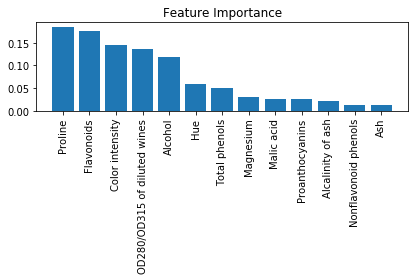

In [8]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("{} {} {} {}".format(f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

# Create a plot that ranks different features.
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')

plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Interestingly, two of the top-ranked features in the plot are also in the three-feature subset selection from the SBS algorithm that we implemented in the previous section (alcohol concentration and OD280/OD315 of diluted wines). However, as far as interpretability is concerned, the random forest technique comes with an important gotcha that is worth mentioning. If two or more features are highly correlated, one feature may be ranked very highly while the information of the other feature(s) may not be fully captured. On the other hand, we don't need to be concerned about this problem if we are merely interested in the predictive performance of a model rather than the interpretation of feature importance values.

*SelectFromModel* object selects features based on a user-specified threshold after model fitting, which is useful if we want to use the *RandomForestClassifier* as a feature selector and intermediate step in a scikit-learn *Pipeline* object, which allows us to connect different preprocessing steps with an estimator.

In [11]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number offeatures that meet this threshold criterion:', X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("{} {} {} {}".format(f+1, 30, feat_labels[indices[f]], importances[indices[f]]))



Number offeatures that meet this threshold criterion: 5
1 30 Proline 0.18545260453273982
2 30 Flavonoids 0.1747509755778874
3 30 Color intensity 0.1439199033723142
4 30 OD280/OD315 of diluted wines 0.13616194422145594
5 30 Alcohol 0.11852941731789321
